In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,"../../src/main")

In [4]:
import data

In [5]:
reload (data)

<module 'data' from '../../src/main/data.pyc'>

In [19]:
if 0:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [20]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [26]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [27]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvdis


In [40]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvcos']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvcos


In [50]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['fwvsoftmax']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax


In [102]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [66]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [6]:
if 0:
    strategy = {'type':'rand', "fold":5}
    types=['kaggle', 'signal','fwv','fwvsoftmax','fwvcos','fwvdis']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

warning, unknown fwvsoftmax
warning, unknown fwvcos
warning, unknown fwvdis


In [21]:
traintest.num_dataset()

5

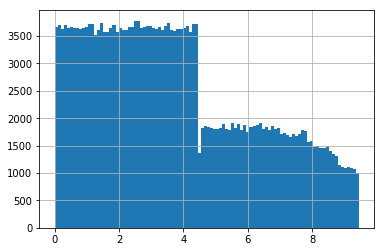

In [22]:
traintest.ydf.hist(bins=100);

In [23]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

2.0751427662143223

In [24]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [25]:
traintest.traindf.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_13_o13686688  0.153793  0.252002  0.115362 -0.135008  0.084726   
quake_11_o10971263  0.186869  0.232279  0.116231 -0.128347  0.081842   
quake_13_o2300617   0.205687  0.200959  0.109438 -0.078377  0.043451   
quake_11_o1146388   0.185285  0.209010  0.129064 -0.108109  0.060230   
quake_03_o14959363  0.171327  0.221359  0.125176 -0.098631  0.061466   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_13_o13686688 -0.021867 -0.005263  0.239939  0.171421 -0.142894  ...   
quake_11_o10971263 -0.029581 -0.003840  0.226696  0.162483 -0.092634  ...   
quake_13_o2300617  -0.137988 -0.009339  0.158783  0.181458 -0.020147  ...   
quake_11_o1146388  -0.080226 -0.029042  0.178731  0.170022 -0.066760  ...   
quake_03_o14959363 -0.084572 -0.004272  0.181916  0.169383 -0.055399  ...   

                      fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                  
quake_13_o13686688  0.109007  0.180867  0.027012  0.044774  0.028781   
quake_11_o10971263  0.093780  0.181602  0.060105  0.039644 -0.010936   
quake_13_o2300617   0.050201  0.184665  0.091970  0.057466 -0.050179   
quake_11_o1146388   0.070571  0.198318  0.072047  0.046459 -0.020315   
quake_03_o14959363  0.072691  0.167620  0.064355  0.057553 -0.031640   

                      fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                 
quake_13_o13686688  0.006128  0.023644 -0.116737 -0.010711  0.164185  
quake_11_o10971263  0.023625  0.018926 -0.114227  0.001870  0.113800  
quake_13_o2300617   0.015093 -0.012664 -0.122463  0.020853  0.062428  
quake_11_o1146388   0.025861  0.020317 -0.107892  0.026311  0.074932  
quake_03_o14959363  0.023935  0.004552 -0.120380  0.007215  0.118175  

[5 rows x 100 columns]

In [26]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [27]:
testpred=[]
for fold in range(traintest.num_dataset()):
    print fold
    Xtr,ytr,Xte,yte=traintest.get_train_data(fold)
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 50000, n_jobs = 3, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    a = model.predict(testdf.values,  num_iteration=model.best_iteration)
    testpred.append(a)

0
(210379, 100) (210379,) (48335, 100) (48335,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.49999	valid_1's l1: 1.64565
[100]	training's l1: 1.32363	valid_1's l1: 1.54522
[150]	training's l1: 1.24239	valid_1's l1: 1.50662
[200]	training's l1: 1.19519	valid_1's l1: 1.49331
[250]	training's l1: 1.16298	valid_1's l1: 1.48689
[300]	training's l1: 1.13903	valid_1's l1: 1.48667
[350]	training's l1: 1.11898	valid_1's l1: 1.48826
[400]	training's l1: 1.10129	valid_1's l1: 1.4901
[450]	training's l1: 1.08471	valid_1's l1: 1.49113
Early stopping, best iteration is:
[273]	training's l1: 1.15136	valid_1's l1: 1.48553
1
(206703, 100) (206703,) (52011, 100) (52011,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.52096	valid_1's l1: 1.66916
[100]	training's l1: 1.34573	valid_1's l1: 1.61202
[150]	training's l1: 1.2644	valid_1's l1: 1.59694
[200]	training's l1: 1.21621	valid_1's l1: 1.59006
[250]	training's l1: 1.18257	vali

[300]	training's l1: 1.19247	valid_1's l1: 1.27915
Early stopping, best iteration is:
[110]	training's l1: 1.36814	valid_1's l1: 1.22551


In [28]:
pred = reduce(lambda u,v: u+v, testpred)/len(testpred)

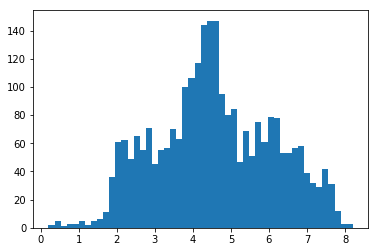

In [29]:
plt.hist(pred,bins=50);

In [30]:
a=pd.DataFrame(pred,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.shape

(2624, 2)

In [31]:
a.head()

seg_id  time_to_failure
0  seg_05a1b0         4.280455
1  seg_f0181d         5.120185
2  seg_5b7325         2.863795
3  seg_c6b514         2.735382
4  seg_52c139         7.337717

In [32]:
a.to_csv("../../input/sub/test_fwv_spcov5fold_lgb.csv",index=None)